Exercice

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import  confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle



df = pd.read_csv('static/Api_app/Training.csv')

df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [2]:
#Pretraitement
df = df.drop(columns='Unnamed: 133')
label_encoder = LabelEncoder()

df['prognosis_encoded'] = label_encoder.fit_transform(df['prognosis'])

df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,prognosis_encoded
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,15


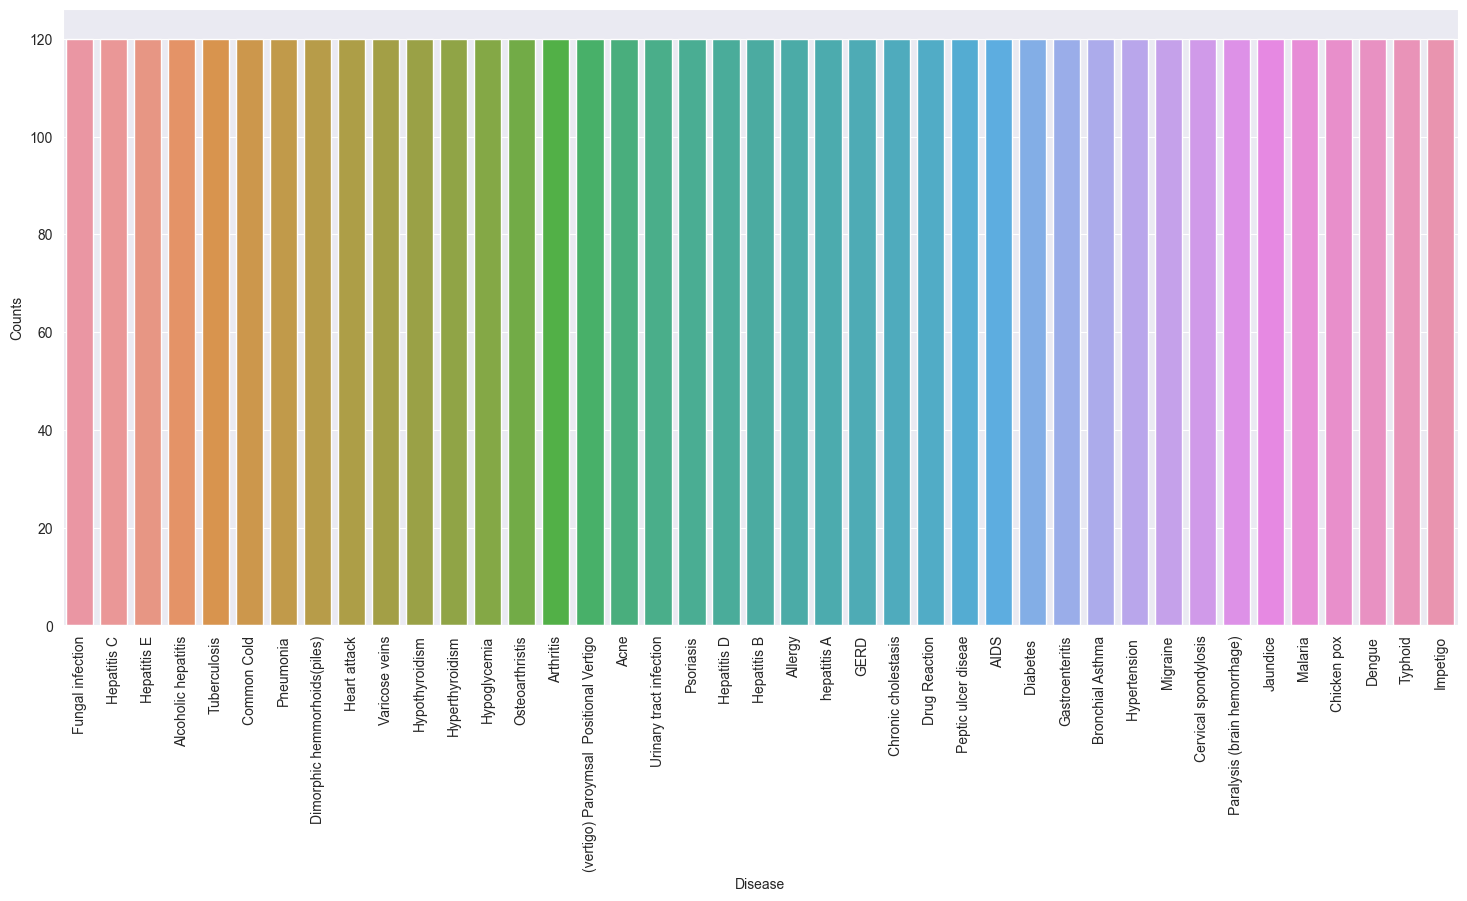

In [3]:
import seaborn as sns

disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [4]:
#Separation des données

X = df.drop(['prognosis', 'prognosis_encoded'], axis=1)
X = X.apply(pd.to_numeric, errors='coerce')
y = df['prognosis_encoded']
features = X.columns



x_train, x_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,

                                                   random_state= 1)
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 3936 samples 
test set size: 984 samples


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

kmeans = KMeans()

kmeans.fit(x_train)

y_pred = kmeans.predict(x_test)

score = silhouette_score(x_test, y_pred)
print("Score de l'algorithme k-means :", accuracy_score(y_test,y_pred))
print("Silhouette :",score)


C:\Users\jessy\PycharmProjects\Api\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score de l'algorithme k-means : 0.023373983739837397
Silhouette : 0.19807079096863964


<h2> Abre de décison </h2>


In [6]:
#Premier model Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

print(classification_report(y_test , y_test_pred))
print("score test :",clf.score(x_test,y_test)* 100 ,"%")
print("score train:",clf.score(x_train ,y_train)* 100 ,"%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        23
          17       1.00    

<h2> Foret aleatoire </h2>


In [7]:
#Random forest

rdm = RandomForestClassifier(n_estimators=50)
rdm = rdm.fit(x_train, y_train)

y_train_pred = rdm.predict(x_train)
y_test_pred = rdm.predict(x_test)

print(classification_report(y_test , y_test_pred))
print("score test :",rdm.score(x_test,y_test)* 100 ,"%")
print("score train:",rdm.score(x_train ,y_train)* 100 ,"%")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        23
          17       1.00    

<h2>Regression Logistics</h2>


In [8]:
#Regression logistics

model = LogisticRegression(multi_class='multinomial')
model.fit(x_test,y_test)
model.feature_names = features

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(classification_report(y_test , y_test_pred))
print("score test :",model.score(x_test,y_test)* 100 ,"%")
print("score train:",model.score(x_train ,y_train)* 100 ,"%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        23
          17       1.00    

<h2>Données test</h2>


In [9]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

df_test = pd.read_csv("static/Api_app/Testing.csv")

df_test['prognosis_encoded'] = label_encoder.fit_transform(df_test['prognosis'])

X = df_test.drop(['prognosis','prognosis_encoded'] ,axis = 1)
y = df_test['prognosis_encoded']

#évaluation

rdm_preds = rdm.predict(X)
clf_preds = clf.predict(X)
model_preds = model.predict(X)

final_preds = [mode([i, j, k], keepdims=True)[0][0] for i, j, k in zip(rdm_preds, clf_preds, model_preds)]


print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(y, final_preds)*100} %")

Accuracy on Test dataset by the combined model: 100.0 %


In [10]:
with open('static/Api_app/model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('static/Api_app/rdm.pkl', 'wb') as file:
    pickle.dump(rdm, file)

with open('static/Api_app/clf.pkl', 'wb') as file:
    pickle.dump(clf, file)

<h2>Regression Logistics Matrice de confusion</h2>

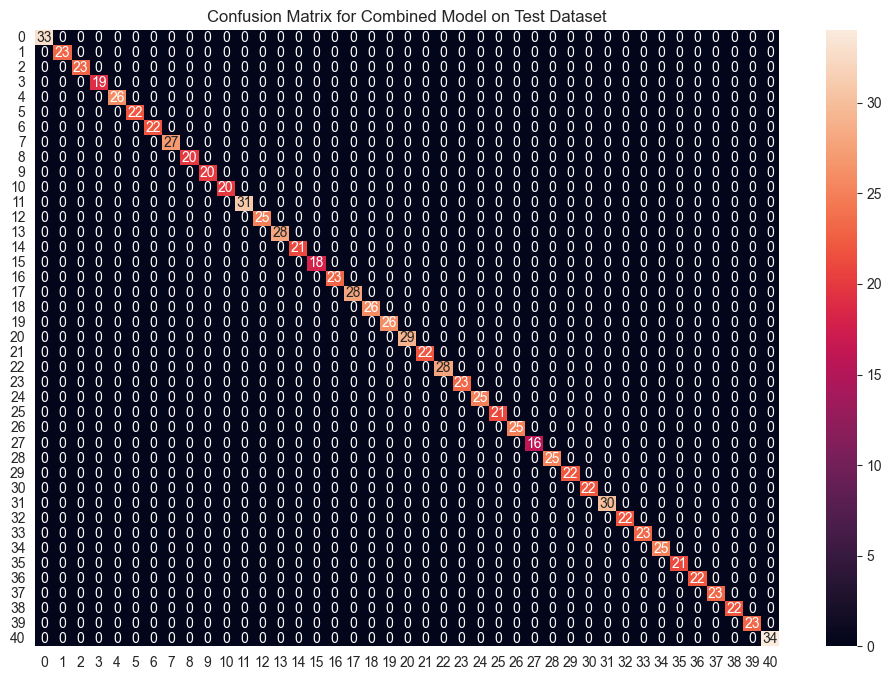

In [11]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

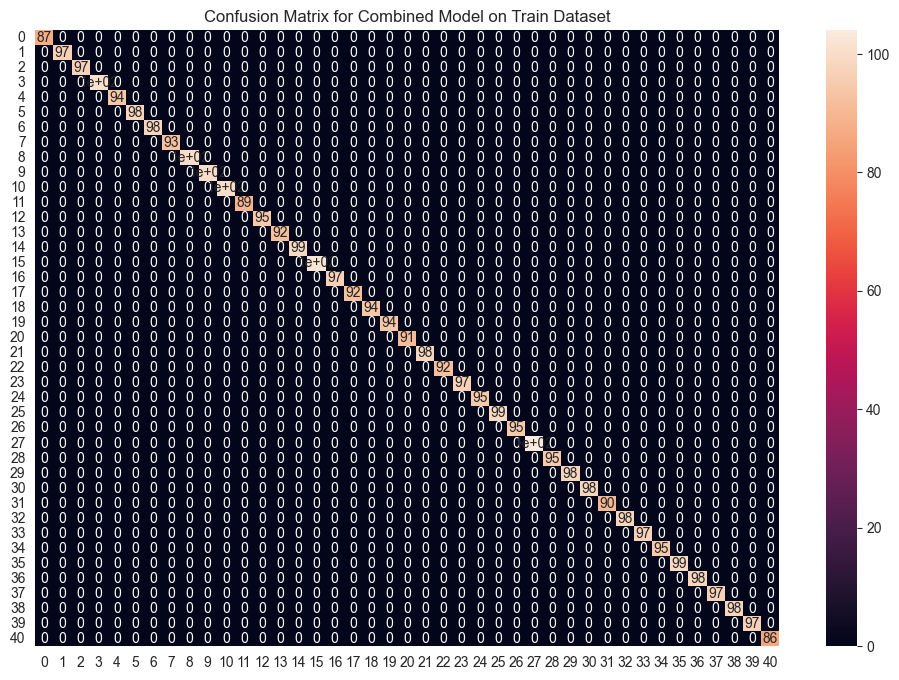

In [12]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Train Dataset")
plt.show()

In [13]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

n_folds = 5

kf = KFold(n_splits=n_folds)

def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models with default hyperparameters
models = {
    "Arbre de decision": DecisionTreeClassifier(),
    "Regrssion Logistic": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Define the hyperparameter grids for each model
param_grids = {
    "Arbre de decision": {"max_depth": [None, 5, 10]},
    "Regrssion Logistic": {"C": [0.1, 1, 10]},
    "Random Forest": {"n_estimators": [50, 100, 150]}
}

# Producing cross validation score for the models with varied hyperparameters
for model_name in models:
    model = models[model_name]
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, scoring=cv_scoring)
    grid_search.fit(x_train, y_train)

    print("=="*30)
    print(model_name)
    print("Best Score:", grid_search.best_score_)
    print("Best Parameters:", grid_search.best_params_)

    # Getting the worst score and parameters
    worst_score_idx = np.argmin(grid_search.cv_results_['mean_test_score'])
    worst_score = grid_search.cv_results_['mean_test_score'][worst_score_idx]
    worst_params = grid_search.cv_results_['params'][worst_score_idx]
    print("Worst Score:", worst_score)
    print("Worst Parameters:", worst_params)


Arbre de decision
Best Score: 1.0
Best Parameters: {'max_depth': None}
Worst Score: 0.1488814404360574
Worst Parameters: {'max_depth': 5}
Regrssion Logistic
Best Score: 1.0
Best Parameters: {'C': 0.1}
Worst Score: 1.0
Worst Parameters: {'C': 0.1}
Random Forest
Best Score: 1.0
Best Parameters: {'n_estimators': 50}
Worst Score: 1.0
Worst Parameters: {'n_estimators': 50}
